In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered/PBMC_decon/All/perectcorr_hardRC_softRC_withmincpg/try1_goodname/flow'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['em4', 'Tregs', 'Mono', 'nB', 'mB', 'NaiveCD4', 'NK', 'cm4']


In [4]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [5]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [6]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)



df_pearson=df_pearson[['OldSM','Soft RC','Soft RC (mincpg=2)','Soft RC (mincpg=3)','Hard RC (mincpg=3)']]

display(df_pearson)



,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
em4,0.625944,0.580906,0.534993,0.558577,0.645926
Tregs,0.761544,0.647884,0.849372,0.749588,0.645434
Mono,0.857718,0.877882,0.779073,0.439611,0.605188
nB,0.828408,0.972305,0.971984,0.950543,0.960006
mB,0.702705,0.914128,0.876917,0.858266,0.844693
NaiveCD4,0.732124,0.734632,0.681941,0.522909,0.518004
NK,0.949784,0.960873,0.949247,0.957864,0.945647
cm4,0.304351,0.818858,0.615594,0.295884,0.111143


In [7]:
df_pearson.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
display(df_pearson)

,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
CD4 effector memory,0.625944,0.580906,0.534993,0.558577,0.645926
Tregs,0.761544,0.647884,0.849372,0.749588,0.645434
Mono,0.857718,0.877882,0.779073,0.439611,0.605188
Naive B,0.828408,0.972305,0.971984,0.950543,0.960006
Memory B,0.702705,0.914128,0.876917,0.858266,0.844693
Naive CD4 T,0.732124,0.734632,0.681941,0.522909,0.518004
NK,0.949784,0.960873,0.949247,0.957864,0.945647
CD4 central memory,0.304351,0.818858,0.615594,0.295884,0.111143


In [8]:
df_spearman.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
df_spearman=df_spearman[['OldSM','Soft RC','Soft RC (mincpg=2)','Soft RC (mincpg=3)','Hard RC (mincpg=3)']]


In [9]:
df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

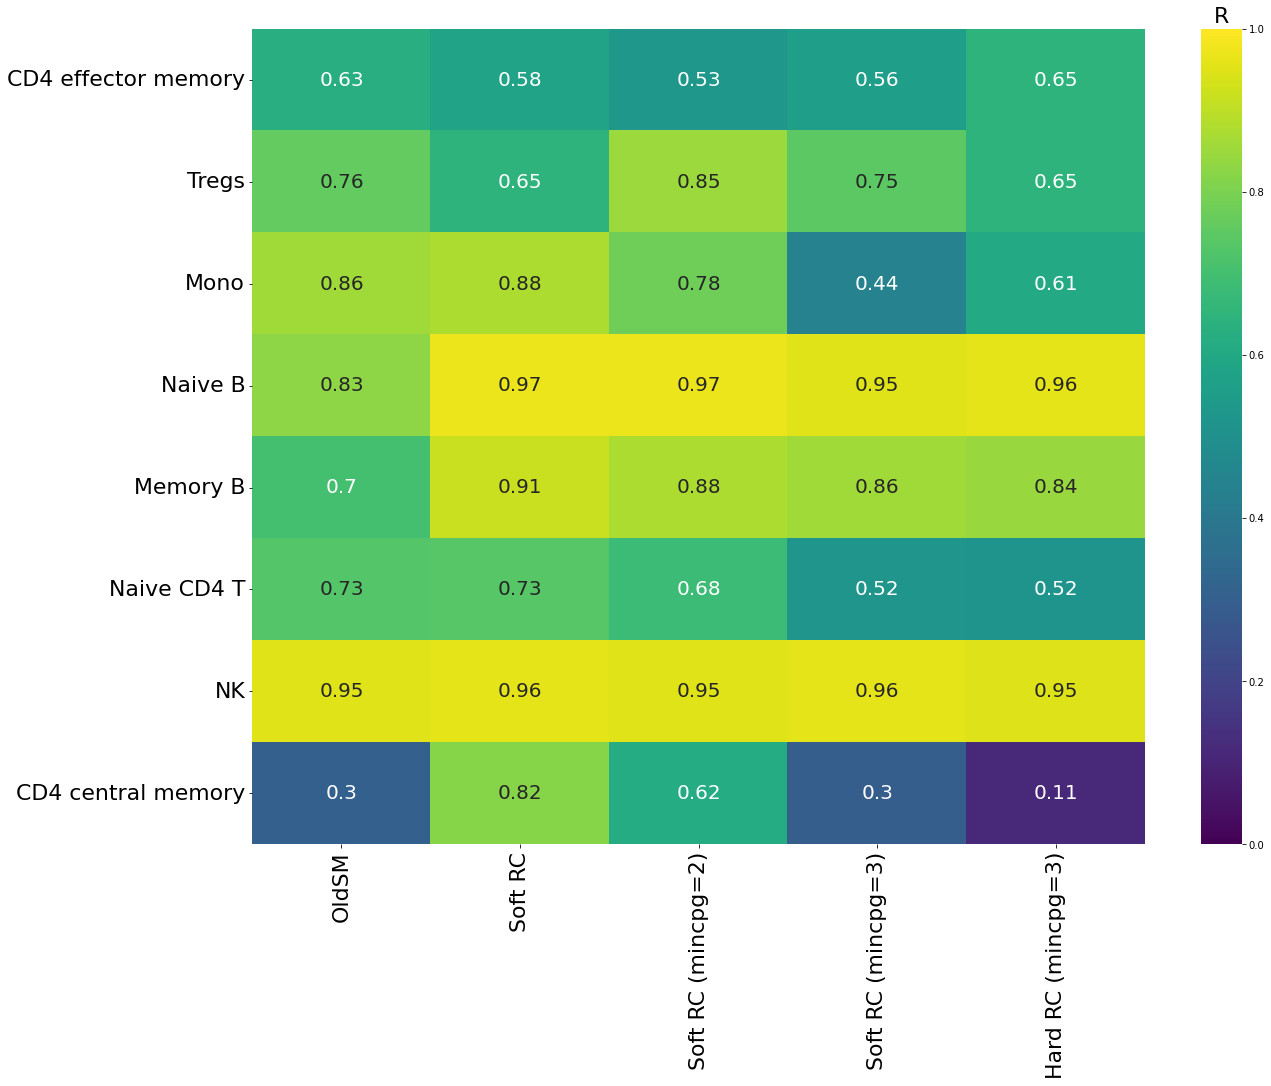

In [10]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

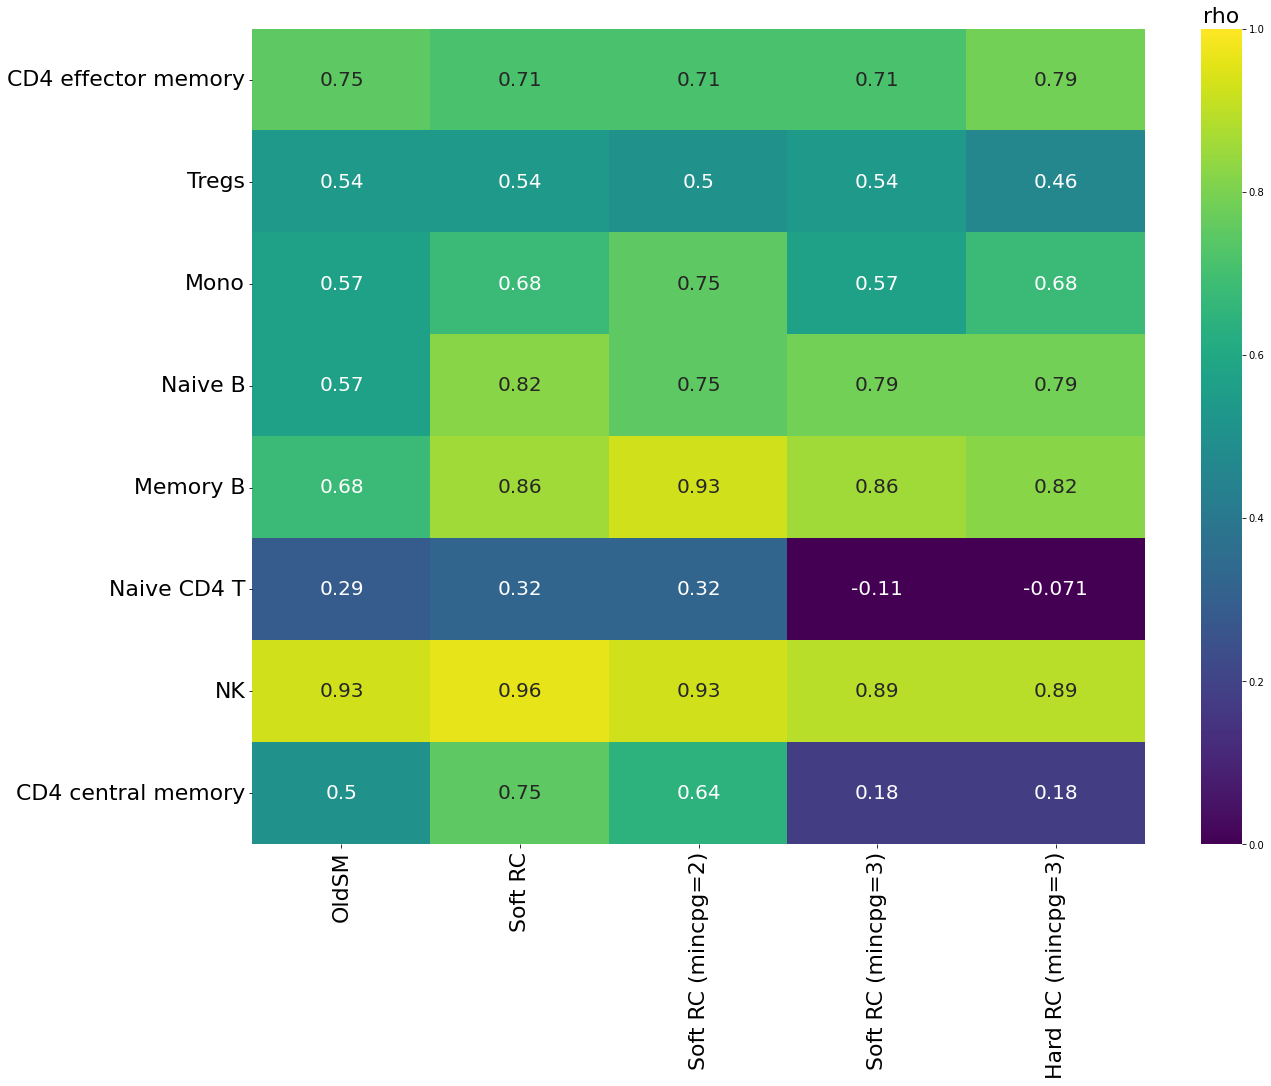

In [11]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')

In [12]:
df_pearson_mean=df_pearson.mean()
df_pearson_mean=df_pearson_mean.to_frame(name='Mean')
df_pearson_mean=df_pearson_mean.transpose()
df_pearson_mean

,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
Mean,0.720322,0.813434,0.78239,0.666655,0.659505


In [13]:
df_pearson_median=df_pearson.median()
df_pearson_median=df_pearson_median.to_frame(name='Median')
df_pearson_median=df_pearson_median.transpose()
df_pearson_median

,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
Median,0.746834,0.84837,0.814223,0.654082,0.64568


In [14]:
dfsummary=pd.concat([df_pearson_mean,df_pearson_median])
dfsummary=dfsummary[['OldSM','Soft RC','Soft RC (mincpg=2)','Soft RC (mincpg=3)','Hard RC (mincpg=3)']]

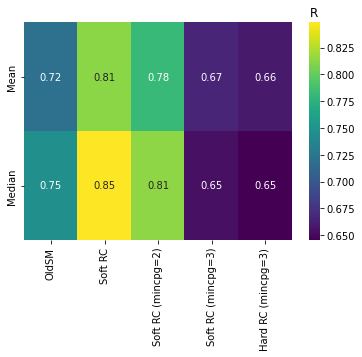

In [15]:

pearson_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_summary.pdf', bbox_inches='tight')

In [16]:
df_spearman_mean=df_spearman.mean()
df_spearman_mean=df_spearman_mean.to_frame(name='Mean')
df_spearman_mean=df_spearman_mean.transpose()
df_spearman_mean

,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
Mean,0.602679,0.705357,0.691964,0.553571,0.566964


In [17]:
df_spearman_median=df_spearman.median()
df_spearman_median=df_spearman_median.to_frame(name='Median')
df_spearman_median=df_spearman_median.transpose()
df_spearman_median

,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
Median,0.571429,0.732143,0.732143,0.642857,0.732143


In [18]:
dfsummary=pd.concat([df_spearman_mean,df_spearman_median])
dfsummary=dfsummary[['OldSM','Soft RC','Soft RC (mincpg=2)','Soft RC (mincpg=3)','Hard RC (mincpg=3)']]
dfsummary

,OldSM,Soft RC,Soft RC (mincpg=2),Soft RC (mincpg=3),Hard RC (mincpg=3)
Mean,0.602679,0.705357,0.691964,0.553571,0.566964
Median,0.571429,0.732143,0.732143,0.642857,0.732143


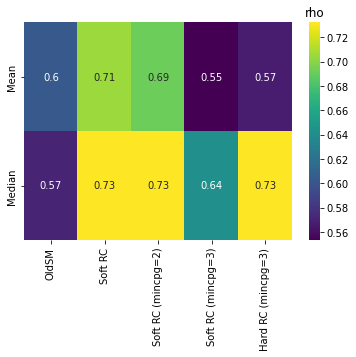

In [19]:
spearman_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_summary.pdf', bbox_inches='tight')